# CS446/546 - Class Session 13 - Similarity and Hierarchical Clustering

In this class session we are going to hierachically cluster (based on Sorensen-Dice similarity) vertices in a directed graph from a landmark paper on human gene regulation (Neph et al., Cell, volume 150, pages 1274-1286, 2012; see PDF on Canvas)

Let's start by having a look at the Neph et al. data file, `neph_gene_network.txt`.  It is in edge-list format, with no header and no "interaction" column.  Just two columns, first column contains the "regulator gene" and the second column contains the "target gene":

    head neph_gene_network.txt
    AHR     BCL6
    AHR     BHLHE41
    AHR     BPTF
    AHR     CEBPA
    AHR     CNOT3
    AHR     CREB1

Now let's load the packages that we will need for this exercise

In [19]:
suppressPackageStartupMessages(library(igraph))

Using `read.table`, read the file `shared/neph_gene_network.txt`; name the two columns of the resulting data frame, `regulator` and `target`.  Since there is no header, we will use `header=FALSE`:

In [21]:
edge_list_neph <- read.table("shared/neph_gene_network.txt",
                            header=FALSE,
                            sep="\t",
                            stringsAsFactors=FALSE,
                            col.names=c("regulator","target"))

Load the edge-list data into a Graph object in igraph, using `graph_from_data_frame`. Make the graph undirected

In [22]:
neph_graph <- graph_from_data_frame(edge_list_neph, directed=FALSE)
summary(neph_graph)

IGRAPH c6d5c31 UN-- 538 47945 -- 
+ attr: name (v/c)


Get the adjacency matrix for the graph, using `get.adjacency`, and assign to matrix `g_matrix`

In [23]:
g_matrix <- get.adjacency(neph_graph)

Compute the Sorensen-Dice similarity of this graph, and assign to similarity matrix `S`, using the igraph `similarity` function and specifying `method="dice"`

Compute a distance matrix by calling `as.dist` on the object 1-S; assign to object `D`

Perform average-linkage hierarchical clustering on this distance object, using `hclust` with `method=average`

Plot the dendrogram using `plot` and make the labels really small using `cex=0.01`, using `plot`

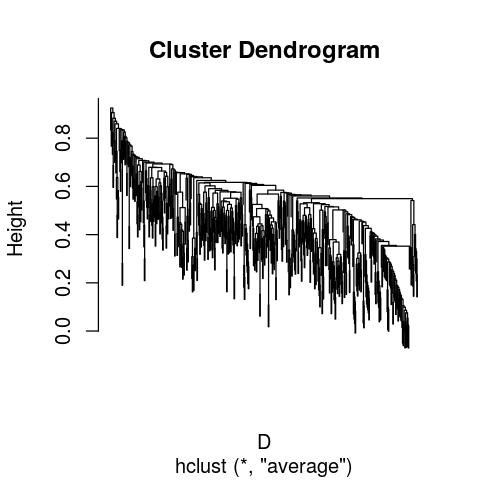